In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.fillna(data.median(), inplace=True)
data = data.dropna()
data = data.drop_duplicates()


C:\Users\bhudi\AppData\Local\Temp\ipykernel_31556\2648489538.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [6]:
data.shape

(150, 6)

In [7]:
import seaborn as sns

C:\Users\bhudi\AppData\Local\Temp\ipykernel_31556\2427359542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

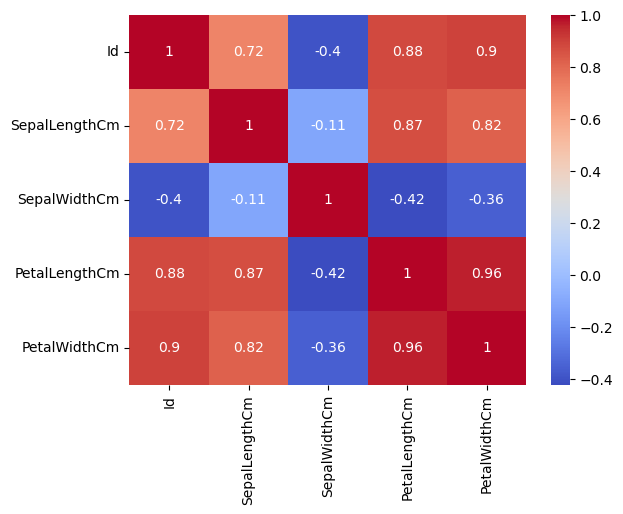

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
feature_importances = model.feature_importances_
print("Feature Importances: ", feature_importances)

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Feature Importances:  [0.40056339 0.04279173 0.01560528 0.25377536 0.28726424]


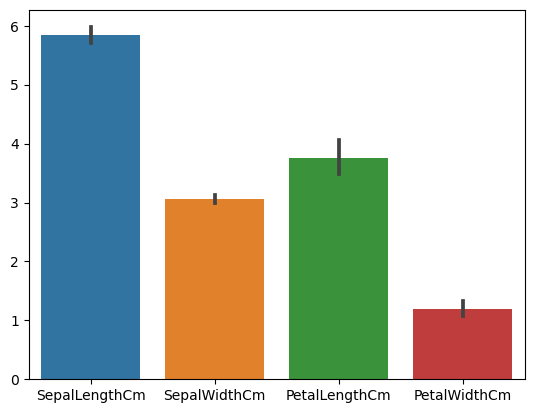

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(data=data.iloc[:, 1:], ax=ax)
plt.show()

In [23]:
import os
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain import PromptTemplate, LLMChain

In [30]:
api_key = 'YOUR_API_KEY'  # Replace with your actual API key
llm = ChatGoogleGenerativeAI(model='gemini-1.5-pro', google_api_key=api_key)

In [31]:
agent = create_csv_agent(llm, "Iris.csv", verbose=False, handle_parsing_errors=True)

C:\Users\bhudi\anaconda3\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:242: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [32]:
agent.invoke("summarize the csv file in great detail. give a big report on it")

{'input': 'summarize the csv file in great detail. give a big report on it',
 'output': "The dataframe contains 150 entries for different Iris flowers. There are 3 unique species of Iris, with Iris-setosa being the most frequent (appearing 50 times). The data includes the flower's sepal length and width, petal length and width, all measured in centimeters. The average sepal length is 5.84 cm with a standard deviation of 0.83 cm, while the average sepal width is 3.05 cm with a standard deviation of 0.43 cm. The average petal length is 3.76 cm with a standard deviation of 1.76 cm, and the average petal width is 1.20 cm with a standard deviation of 0.76 cm."}